# Twitter sentiment analysis

### Importing libraires

API Key:

DaaUw67HhyjhBwbrkTEFmQ6mb

API Secret Key:

Df9ojIhXJwfexyNFwAkSmzMchivFUWFFwjzv59q2KpK3BINMFl

Access Token:

1396221089353764864-TDjWrEHpOSQ2fwq0rYbTm6UQN8vQSJ



Access Token Secret:

wCRZCX1s7vKCQUAu6yqT2LfkeS6fPBElx9JnhAPtHXqEP



In [15]:
!pip install textblob
from textblob import TextBlob

In [16]:
!pip install tweepy 
import tweepy

In [17]:
import matplotlib.pyplot as plt

### Connecting to Twitter API

In [18]:
consumer_key = "DaaUw67HhyjhBwbrkTEFmQ6mb"
consumer_secret = "Df9ojIhXJwfexyNFwAkSmzMchivFUWFFwjzv59q2KpK3BINMFl"
access_token = "1396221089353764864-TDjWrEHpOSQ2fwq0rYbTm6UQN8vQSJ"
access_token_secret = "wCRZCX1s7vKCQUAu6yqT2LfkeS6fPBElx9JnhAPtHXqEP"

In [19]:
auth = tweepy.auth.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth)

try:
    api.verify_credentials()
    print("Authentication OK")
except:
    print("Error during authentication")

Authentication OK


In [20]:
search_term = "The Blacklist"
no_of_tweets = 100

In [21]:
tweets = tweepy.Cursor(api.search, q = search_term).items(no_of_tweets)

In [22]:
tweets

### Now the next step is to analyse the tweets that we got thanks to tweepy

In [23]:
negative = 0
positive = 0
neutral = 0
polarity = 0

In [24]:
for tweet in tweets : 
    analysis = TextBlob(tweet.text)
    polarity += analysis.sentiment.polarity
    
    if(analysis.sentiment.polarity == 0):
        neutral +=1
    elif(analysis.sentiment.polarity > 0.00):
        positive += 1
    elif(analysis.sentiment.polarity < 0.00):
        negative += 1

This function will give us the percentage of number of positive, negative and neutral tweets 

In [25]:
def percentage(number, total):
    return 100* float(number)/float(total)

In [26]:
positive = percentage(positive,no_of_tweets)
negative = percentage(negative,no_of_tweets)
neutral = percentage(neutral,no_of_tweets)
polarity = percentage(polarity,no_of_tweets)

In [27]:
positive = format(positive,'.2f')
negative = format(negative,'.2f')
neutral = format(neutral,'.2f')

In [29]:
positive

'18.00'

In [30]:
negative

'13.00'

In [31]:
neutral

'69.00'

### Display the result

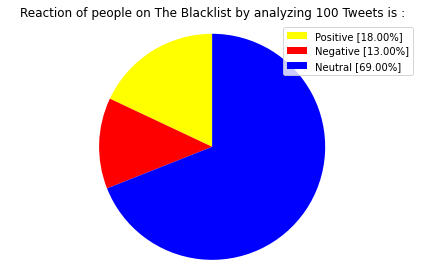

In [32]:
labels = ['Positive ['+str(positive)+'%]','Negative ['+str(negative)+'%]','Neutral ['+str(neutral)+'%]']


sizes = [positive, negative, neutral]
colors = ['yellow', 'red', 'blue']

patches, texts= plt.pie(sizes, colors = colors, startangle=90)
plt.legend(patches,labels,loc = "best")
plt.title('Reaction of people on '+ search_term +' by analyzing '+str(no_of_tweets)+' Tweets is :')
plt.axis('equal')
plt.tight_layout()
plt.show()